In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import vmo
import vmo.VMO.utility as vutils
import vmo.analysis as van
import librosa 
import numpy as np
import pretty_midi
import sklearn.preprocessing as pre

import matplotlib.pyplot as plt 

%matplotlib inline

/Users/EJ/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
midi_file = '/Users/EJ/dev/vmo/bin/files/midi/parker_omnibook/now_s_the_time.mid'
midi = pretty_midi.PrettyMIDI(midi_file) 

In [5]:
print midi.instruments

[Instrument(program=32, is_drum=False, name="Bass    (BB) "), Instrument(program=0, is_drum=True, name="Drums   (BB) "), Instrument(program=0, is_drum=False, name="Piano   (BB) ")]


In [6]:
# chroma matrix - the energy in each semitone across octaves
chroma_midi = midi.get_chroma(times=np.arange(0, midi.get_end_time(), 1/25.0))

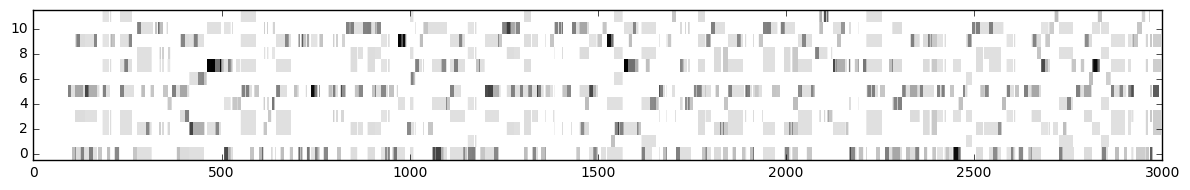

In [7]:
plt.figure(figsize=(12,2))
plt.imshow(chroma_midi, origin='lower', aspect='auto', interpolation='nearest', cmap='Greys')
plt.tight_layout()

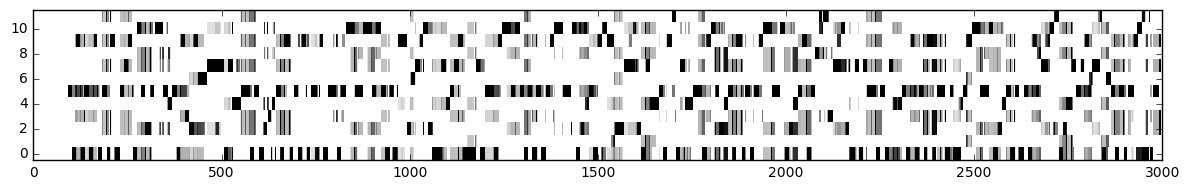

In [8]:
chroma_midi = pre.maxabs_scale(chroma_midi, axis=0)+np.finfo(float).eps

plt.figure(figsize=(12,2))
plt.imshow(chroma_midi, origin='lower', aspect='auto', interpolation='nearest', cmap='Greys')
plt.tight_layout()

In [9]:
midi_chroma_length = midi.get_end_time()/ chroma_midi.shape[1]
beat_positions = midi.get_beats().tolist()
beat_positions.append(midi.get_end_time())
midi_chroma_beat_indeces = []
midi_chroma_idx = 0

In [10]:
for i in range(chroma_midi.shape[1]):

    if i * midi_chroma_length >= beat_positions[midi_chroma_idx]:
        midi_chroma_beat_indeces.append(i)
        midi_chroma_idx += 1

    if midi_chroma_idx >= len(beat_positions):
        print "!!!"
        break

In [11]:
chroma_midi_beat = librosa.feature.sync(chroma_midi, midi_chroma_beat_indeces, aggregate=np.mean)

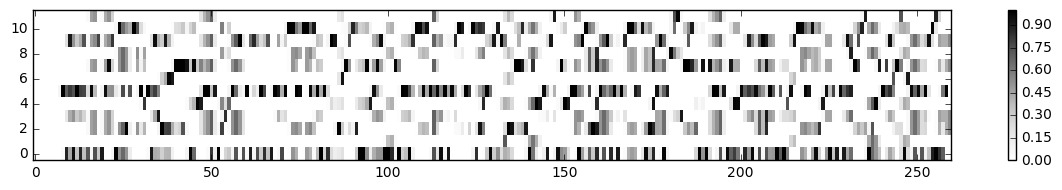

In [12]:
plt.figure(figsize=(12,2))
plt.imshow(chroma_midi_beat, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.Greys)
plt.colorbar()
plt.tight_layout()
plt.show()

In [13]:
r = (0, 2.01, 0.01)
threshold = vmo.find_threshold(chroma_midi_beat.T, r=r, dim=12,
                               dfunc='other', 
                               dfunc_handle=vutils.tonnetz_dist
                              )

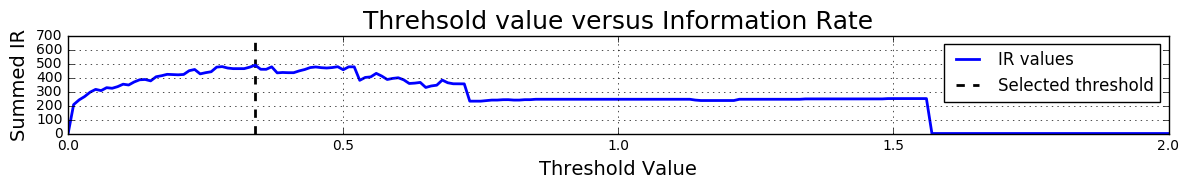

In [14]:
ideal_t = threshold[0][1]
x_t = [i[1] for i in threshold[1]]
y_t = [i[0] for i in threshold[1]]

plt.figure(figsize=(12,2))
plt.plot(x_t, y_t, linewidth = 2)
plt.hold('on')
plt.vlines(ideal_t, 0.0, 700, colors='k',linestyle = 'dashed',linewidth = 2)
plt.grid('on')
plt.legend(['IR values', 'Selected threshold'], loc=1)
plt.title('Threhsold value versus Information Rate', fontsize = 18)
plt.xlabel('Threshold Value',fontsize = 14)
plt.ylabel('Summed IR', fontsize = 14)
plt.tight_layout()


Codes not generated. Generating codes with encode().


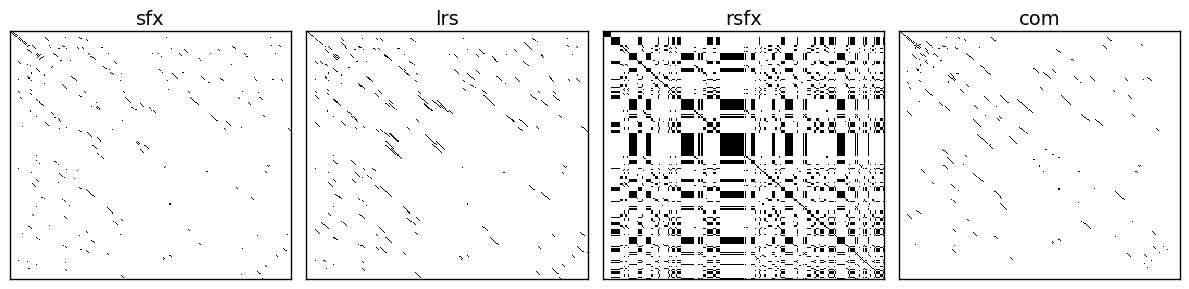

In [15]:
midi_vmo = vmo.build_oracle(chroma_midi_beat.T, flag='a', threshold=ideal_t, dim=12,
                            dfunc='other', 
                            dfunc_handle=vutils.tonnetz_dist
                            )
methods = ['sfx', 'lrs', 'rsfx', 'com']

plt.figure(figsize = (12,3))
for i,m in enumerate(methods):
    recurrence_vmo = van.create_selfsim(midi_vmo, method=m)
    plt.subplot(1,len(methods),i+1)
    plt.imshow(recurrence_vmo, interpolation='nearest', aspect='auto', cmap='Greys')
    plt.title(m, fontsize=14)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

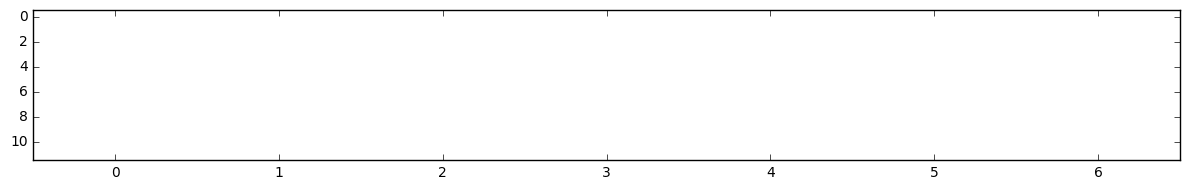

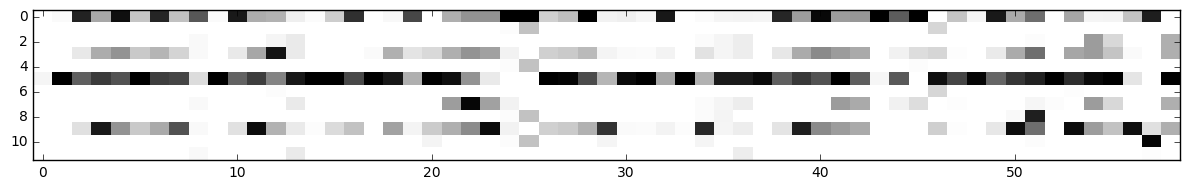

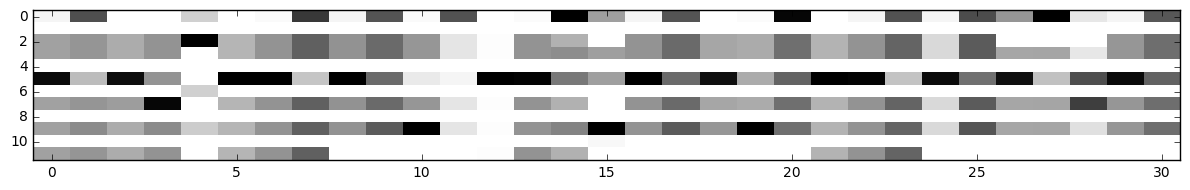

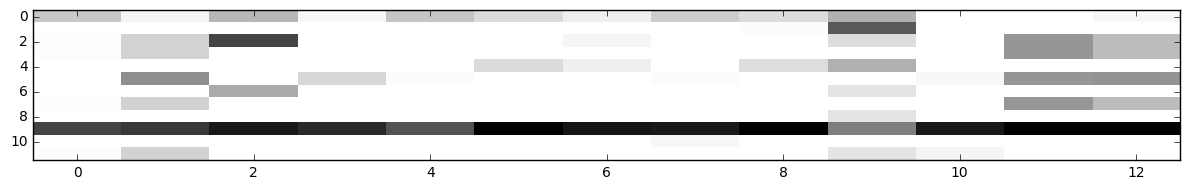

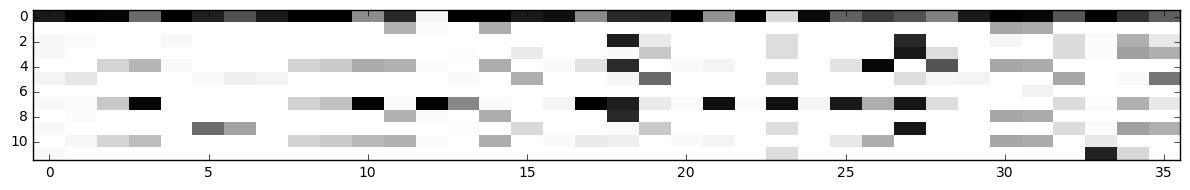

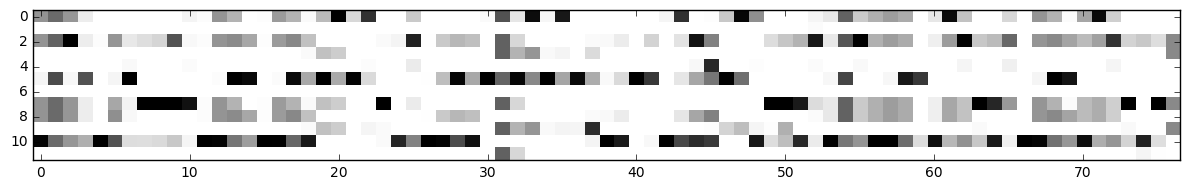

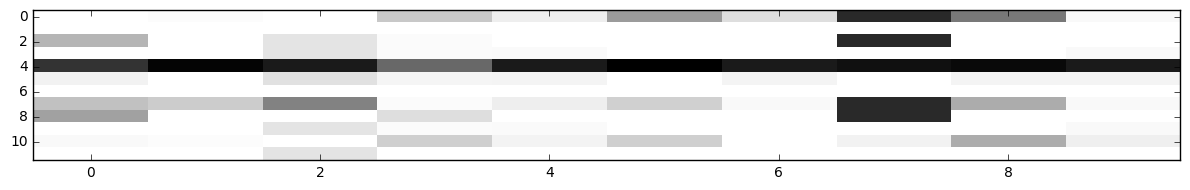

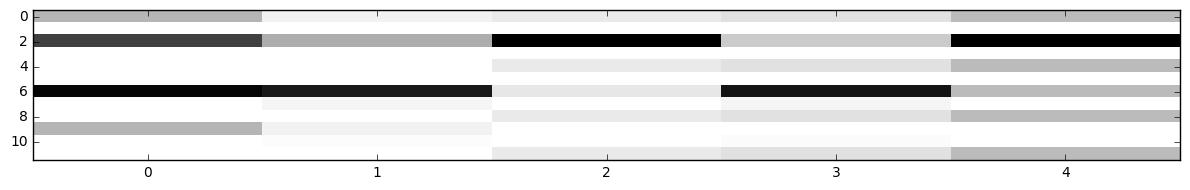

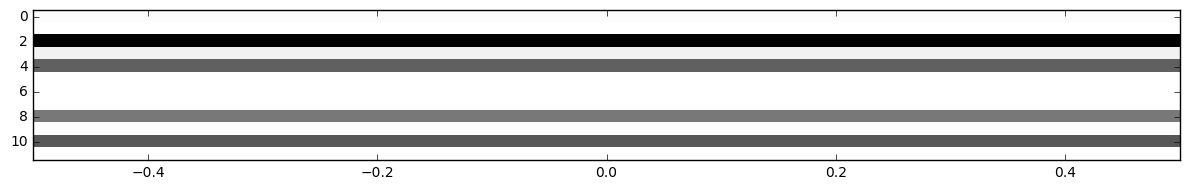

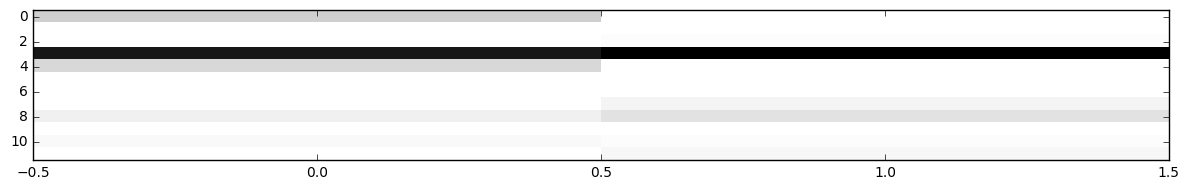

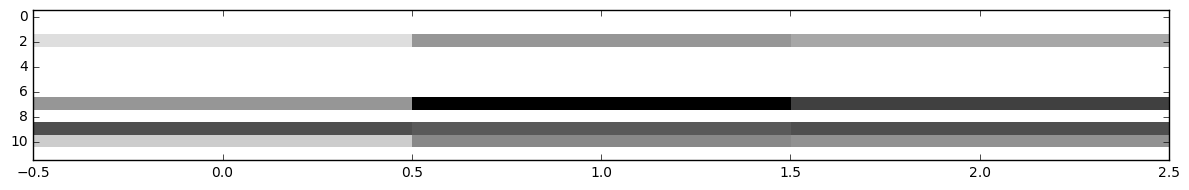

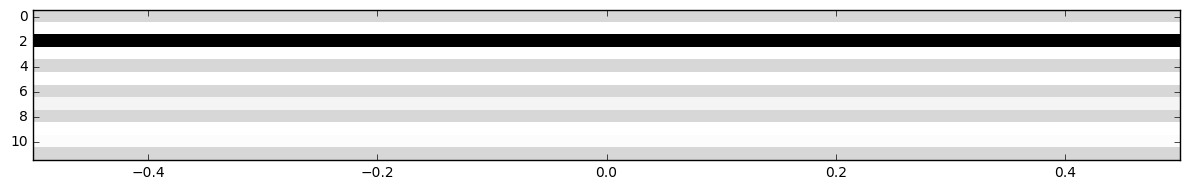

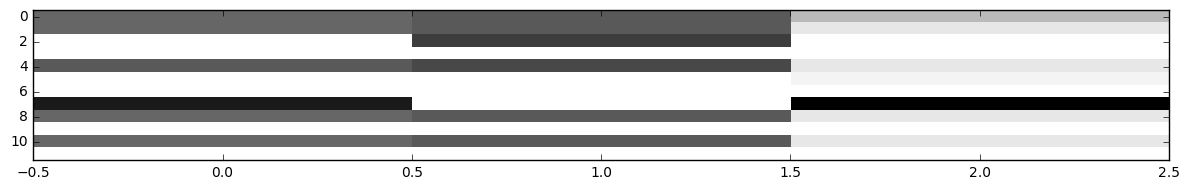

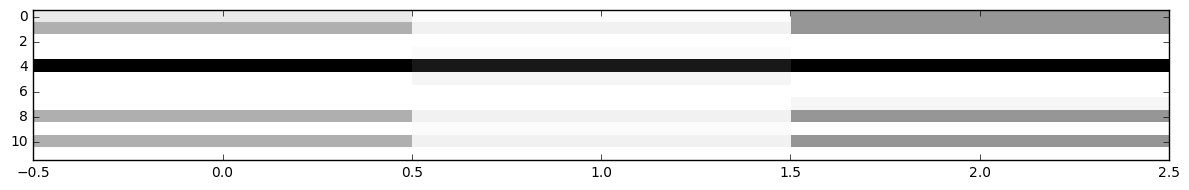

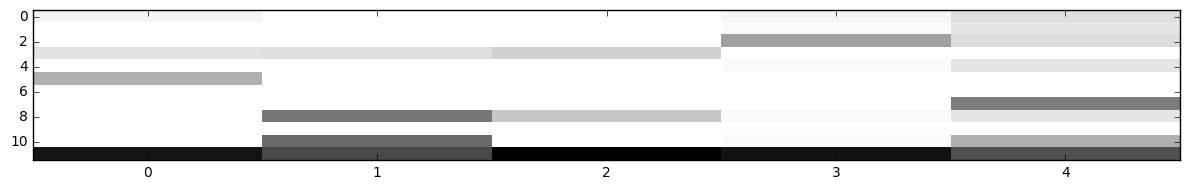

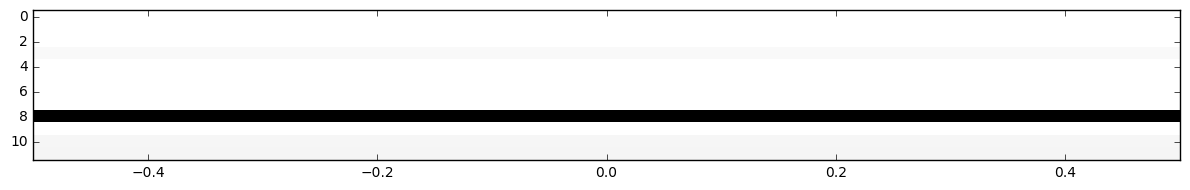

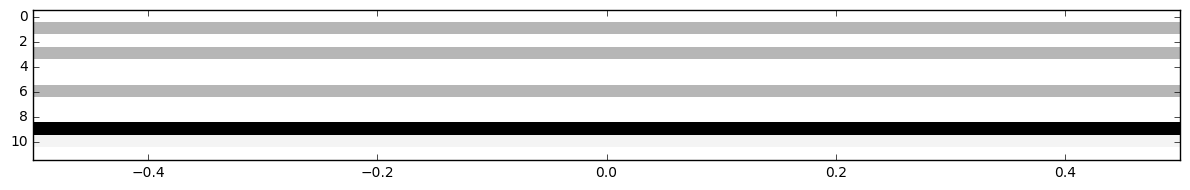

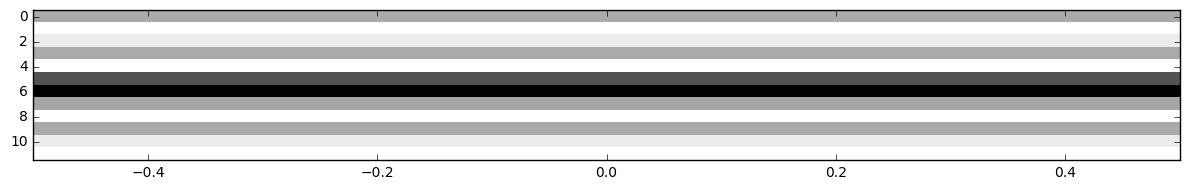

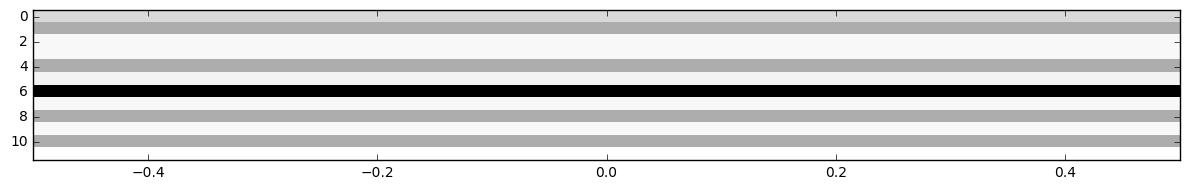

In [16]:
for c in midi_vmo.latent:
    cluster_mat = chroma_midi_beat.T[np.array(c)-1]
    plt.figure(figsize=(12,2))
    plt.imshow(cluster_mat.T, aspect='auto', interpolation='nearest', cmap='Greys')
    plt.tight_layout()

In [17]:
print midi_chroma_beat_indeces

[0, 12, 24, 35, 47, 58, 70, 81, 93, 104, 116, 127, 139, 150, 162, 174, 185, 197, 208, 220, 231, 243, 254, 266, 277, 289, 300, 312, 324, 335, 347, 358, 370, 381, 393, 404, 416, 427, 439, 450, 462, 474, 485, 497, 508, 520, 531, 543, 554, 566, 577, 589, 601, 612, 624, 635, 647, 658, 670, 681, 693, 704, 716, 727, 739, 751, 762, 774, 785, 797, 808, 820, 831, 843, 854, 866, 877, 889, 900, 912, 924, 935, 947, 958, 970, 981, 993, 1004, 1016, 1027, 1039, 1050, 1062, 1074, 1085, 1097, 1108, 1120, 1131, 1143, 1154, 1166, 1177, 1189, 1200, 1212, 1224, 1235, 1247, 1258, 1270, 1281, 1293, 1304, 1316, 1327, 1339, 1350, 1362, 1374, 1385, 1397, 1408, 1420, 1431, 1443, 1454, 1466, 1477, 1489, 1500, 1512, 1524, 1535, 1547, 1558, 1570, 1581, 1593, 1604, 1616, 1627, 1639, 1650, 1662, 1674, 1685, 1697, 1708, 1720, 1731, 1743, 1754, 1766, 1777, 1789, 1800, 1812, 1824, 1835, 1847, 1858, 1870, 1881, 1893, 1904, 1916, 1927, 1939, 1950, 1962, 1974, 1985, 1997, 2008, 2020, 2031, 2043, 2054, 2066, 2077, 2089, 2101

In [18]:
print midi_vmo.latent

[[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15, 16, 33, 34, 35, 36, 52, 61, 65, 66, 69, 70, 71, 72, 97, 98, 99, 100, 101, 105, 106, 107, 108, 145, 165, 166, 167, 168, 180, 196, 201, 202, 203, 204, 209, 210, 211, 212, 213, 215, 227, 229, 230, 231, 232, 241, 243, 251, 253, 254, 255, 259], [17, 18, 21, 22, 37, 49, 50, 51, 57, 58, 59, 60, 153, 154, 155, 156, 161, 162, 177, 178, 179, 193, 194, 195, 205, 206, 225, 226, 242, 249, 250], [19, 23, 38, 63, 67, 85, 86, 131, 133, 134, 147, 163, 207], [20, 24, 45, 46, 53, 62, 64, 68, 93, 94, 95, 102, 103, 104, 141, 146, 149, 150, 160, 164, 189, 190, 191, 192, 197, 198, 199, 208, 214, 228, 237, 247, 252, 256, 257, 258], [25, 26, 27, 28, 29, 30, 31, 41, 42, 43, 44, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 89, 91, 92, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 137, 138, 139, 140, 157, 158, 159, 169, 170, 171, 172, 173, 174, 175, 185, 187, 188, 217, 218, 219, 220, 221,

In [19]:
print midi_chroma_beat_indeces

[0, 12, 24, 35, 47, 58, 70, 81, 93, 104, 116, 127, 139, 150, 162, 174, 185, 197, 208, 220, 231, 243, 254, 266, 277, 289, 300, 312, 324, 335, 347, 358, 370, 381, 393, 404, 416, 427, 439, 450, 462, 474, 485, 497, 508, 520, 531, 543, 554, 566, 577, 589, 601, 612, 624, 635, 647, 658, 670, 681, 693, 704, 716, 727, 739, 751, 762, 774, 785, 797, 808, 820, 831, 843, 854, 866, 877, 889, 900, 912, 924, 935, 947, 958, 970, 981, 993, 1004, 1016, 1027, 1039, 1050, 1062, 1074, 1085, 1097, 1108, 1120, 1131, 1143, 1154, 1166, 1177, 1189, 1200, 1212, 1224, 1235, 1247, 1258, 1270, 1281, 1293, 1304, 1316, 1327, 1339, 1350, 1362, 1374, 1385, 1397, 1408, 1420, 1431, 1443, 1454, 1466, 1477, 1489, 1500, 1512, 1524, 1535, 1547, 1558, 1570, 1581, 1593, 1604, 1616, 1627, 1639, 1650, 1662, 1674, 1685, 1697, 1708, 1720, 1731, 1743, 1754, 1766, 1777, 1789, 1800, 1812, 1824, 1835, 1847, 1858, 1870, 1881, 1893, 1904, 1916, 1927, 1939, 1950, 1962, 1974, 1985, 1997, 2008, 2020, 2031, 2043, 2054, 2066, 2077, 2089, 2101

In [20]:
def state_to_frame(path, beat_loc_list):
    """
    :param path: integer or a list, numpy array of intergers stands for the sequence that needs to be converted
    :param beat_loc_list: the list containing beat or events locations
    :return: reconstructed list by the beat or events
    """

    midi_synth_result = []
    for preLoc,postLoc in zip(path[:-1], path[1:]):
        midi_synth_result.append(range(beat_loc_list[preLoc], beat_loc_list[postLoc]))
        return midi_synth_result


In [21]:
path = [0, 12, 24, 35, 47, 58, 70, 81, 93, 104, 116, 127, 139, 150, 162, 174, 185, 197, 208, 220, 231, 243, 254, 266, 277, 289, 300, 312, 324, 335, 347, 358, 370, 381, 393, 404, 416, 427, 439, 450, 462, 474, 485, 497, 508, 520, 531, 543, 554, 566, 577, 589, 601, 612, 624, 635, 647, 658, 670, 681, 693, 704, 716, 727, 739, 751, 762, 774, 785, 797, 808, 820, 831, 843, 854, 866, 877, 889, 900, 912, 924, 935, 947, 958, 970, 981, 993, 1004, 1016, 1027, 1039, 1050, 1062, 1074, 1085, 1097, 1108, 1120, 1131, 1143, 1154, 1166, 1177, 1189, 1200, 1212, 1224, 1235, 1247, 1258, 1270, 1281, 1293, 1304, 1316, 1327, 1339, 1350, 1362, 1374, 1385, 1397, 1408, 1420, 1431, 1443, 1454, 1466, 1477, 1489, 1500, 1512, 1524, 1535, 1547, 1558, 1570, 1581, 1593, 1604, 1616, 1627, 1639, 1650, 1662, 1674, 1685, 1697, 1708, 1720, 1731, 1743, 1754, 1766, 1777, 1789, 1800, 1812, 1824, 1835, 1847, 1858, 1870, 1881, 1893, 1904, 1916, 1927, 1939, 1950, 1962, 1974, 1985, 1997, 2008, 2020, 2031, 2043, 2054, 2066, 2077, 2089, 2101, 2112, 2124, 2135, 2147, 2158, 2170, 2181, 2193, 2204, 2216, 2227, 2239, 2251, 2262, 2274, 2285, 2297, 2308, 2320, 2331, 2343, 2354, 2366, 2377, 2389, 2401, 2412, 2424, 2435, 2447, 2458, 2470, 2481, 2493, 2504, 2516, 2527, 2539, 2551, 2562, 2574, 2585, 2597, 2608, 2620, 2631, 2643, 2654, 2666, 2677, 2689, 2701, 2712, 2724, 2735, 2747, 2758, 2770, 2781, 2793, 2804, 2816, 2827, 2839, 2851, 2862, 2874, 2885, 2897, 2908, 2920, 2931, 2943, 2954, 2966, 2977, 2989]

r = state_to_frame(path, midi_chroma_beat_indeces)
print r


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]]
